In [1]:
import os
import sys
import pickle

import tensorflow as tf

from utils import *
import DeepLabModel as DL

# 우리가 추가한 모듈의 path를 sys.path에 임시로 추가해준다.
# 특정 directory에 있는 모듈을 추가할 수 있다.
sys.path.append(os.getcwd())

(437, 510, 3)


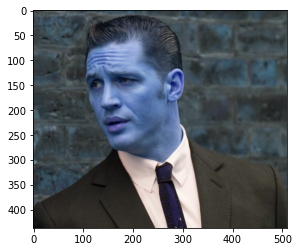

In [2]:
img_path = os.path.join(os.getcwd(),'images/tom.jpg')
img_orig = read_img(img_path, plot_img=True)

In [3]:
download_path = download_weight()

temp directory: /home/aiffel0042/project/E13_Shallow_Focusing


In [4]:
MODEL = DL.DeepLabModel(download_path)

In [5]:
img, seg_map = MODEL.run(img_orig)

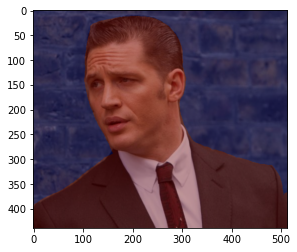

In [6]:
img_mask, img_show = get_interest_obj(img, seg_map, obj_num=15, plot_img=True)

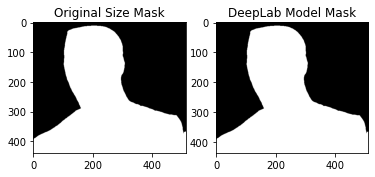

In [7]:
img_resized_mask = resize_image(img_mask, img_orig, plot_img=True)

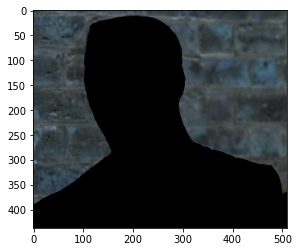

In [8]:
img_bg = get_background(img_orig, img_resized_mask, plot_img=True)

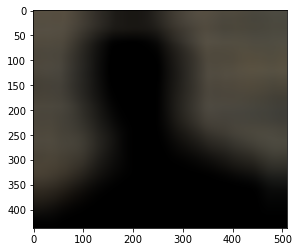

In [9]:
img_bg_blur = get_blur_image(img_bg, plot_img=True)

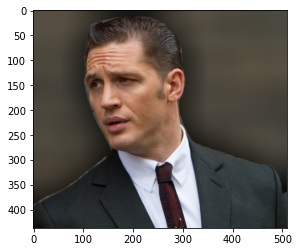

In [10]:
concat_obj_bg(img_resized_mask, img_orig, img_bg_blur)

### 크로마키 만들기

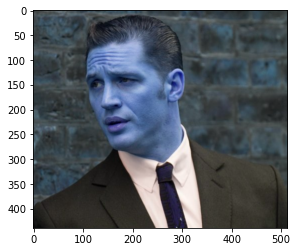

In [11]:
plt.imshow(img)

In [12]:
cro_path = os.path.join(os.getcwd(),'images/background.jpg')
cro_img = read_img(cro_path, plot_img=False)

(467, 700, 3)


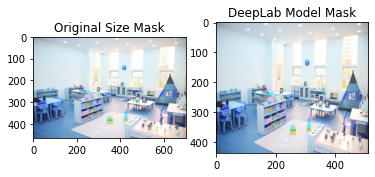

In [13]:
cro_img = resize_image(cro_img, img_orig, is_segment=False)

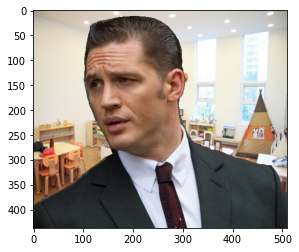

In [19]:
concat_obj_bg(img_resized_mask, img_orig, cro_img)